# Laboratorio 3:  
## Análisis GeoEspacial y Sensores Remotos  
**Monitoreo de Deforestación en la Región de Petén, Guatemala usando Imágenes Sentinel-2**  

**Autores:**  
- José Rodrigo Marchena – 22398  
- Sofía Velasquez – 22049  


In [ ]:
#!pip install rasterio

  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached attrs-25.3.0-py3-none-any.whl (63 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl (11 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click-8.1.8-py3-none-any.whl (98 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\50250\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar imágenes con rasterio
ruta_rojo_2020 = "./images/2020-03-05_B04.tiff"
ruta_nir_2020 = "./images/2020-03-05_B08.tiff"
ruta_rojo_2024 = "./images/2024-05-03_B04.tiff"
ruta_nir_2024 = "./images/2024-05-03_B08.tiff"

with rasterio.open(ruta_rojo_2020) as src:
    rojo_2020 = src.read(1).astype('float32')
    profile = src.profile

with rasterio.open(ruta_nir_2020) as src:
    nir_2020 = src.read(1).astype('float32')

with rasterio.open(ruta_rojo_2024) as src:
    rojo_2024 = src.read(1).astype('float32')

with rasterio.open(ruta_nir_2024) as src:
    nir_2024 = src.read(1).astype('float32')


### Parte 3: Cálculo de NDVI y Detección de Cambios

In [16]:
# Calcular NDVI para 2020 y 2024
ndvi_2020 = (nir_2020 - rojo_2020) / (nir_2020 + rojo_2020 + 1e-10)
ndvi_2024 = (nir_2024 - rojo_2024) / (nir_2024 + rojo_2024 + 1e-10)

# Imagen de diferencia
diferencia_ndvi = ndvi_2024 - ndvi_2020

# Umbral para pérdida significativa de vegetación
umbral = -0.2
mascara_deforestacion = diferencia_ndvi < umbral

ValueError: operands could not be broadcast together with shapes (2295,2500) (1808,2500) 

### Parte 4: Visualización y Reporte

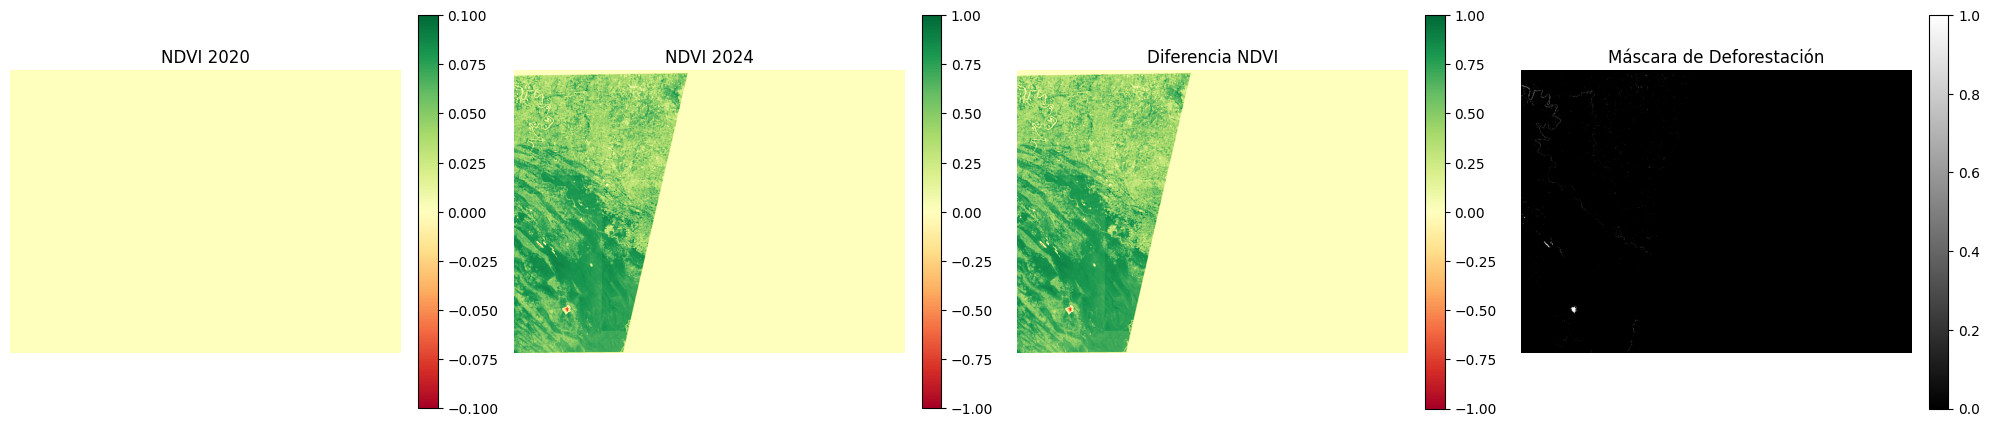

In [12]:
# Visualizaciones
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
imgs = [
    (ndvi_2020, "NDVI 2020"),
    (ndvi_2024, "NDVI 2024"),
    (diferencia_ndvi, "Diferencia NDVI"),
    (mascara_deforestacion, "Máscara de Deforestación")
]

for ax, (img, title) in zip(axs, imgs):
    im = ax.imshow(img, cmap='RdYlGn' if "NDVI" in title else 'gray')
    ax.set_title(title)
    ax.axis('off')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [13]:
# 6. Calcular área de deforestación en porcentaje
pixeles_totales = mascara_deforestacion.size
pixeles_deforestados = np.sum(mascara_deforestacion)
porcentaje_deforestacion = (pixeles_deforestados / pixeles_totales) * 100

print(f"Área de deforestación: {porcentaje_deforestacion:.2f}%")

Área de deforestación: 0.12%
